In [2]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from sklearn.model_selection import train_test_split

2024-07-27 14:35:45.068015: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 14:35:45.068121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 14:35:45.172586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# generators
train_dataset=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
test_dataset=keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
#Normalize
def process(image,label):
    image= tf.cast(image/255. ,tf.float32)
    return image,label
train_ds=train_dataset.map(process)
test_ds=test_dataset.map(process)

In [5]:
# create CNN model

model =Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(255,255,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
  3/625 ━━━━━━━━━━━━━━━━━━━━ 34s 56ms/step - accuracy: 0.4774 - loss: 0.7923 

I0000 00:00:1722090978.009366     120 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1722090978.030619     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6039 - loss: 0.6545

W0000 00:00:1722091018.251713     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.6040 - loss: 0.6544 - val_accuracy: 0.6720 - val_loss: 0.5967
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.7421 - loss: 0.5141 - val_accuracy: 0.7818 - val_loss: 0.4927
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.8125 - loss: 0.4079 - val_accuracy: 0.7886 - val_loss: 0.5349
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.8821 - loss: 0.2768 - val_accuracy: 0.7920 - val_loss: 0.7549
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9429 - loss: 0.1442 - val_accuracy: 0.7918 - val_loss: 0.9718
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9721 - loss: 0.0914 - val_accuracy: 0.7872 - val_loss: 1.1280
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9807 - loss: 0.0583 - val_accuracy: 0.7804 - val_loss: 1.2119
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.9827 - loss: 0.0530 - val_accurac

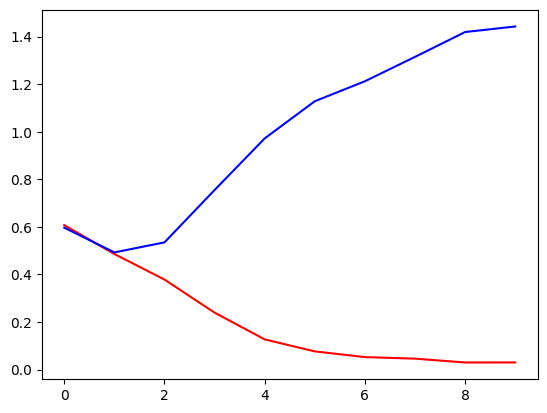

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='train')

In [10]:
model_whit_batchnormalization_and_dropouts =Sequential()

model_whit_batchnormalization_and_dropouts.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(255,255,3)))
model_whit_batchnormalization_and_dropouts.add(BatchNormalization())
model_whit_batchnormalization_and_dropouts.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_whit_batchnormalization_and_dropouts.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model_whit_batchnormalization_and_dropouts.add(BatchNormalization())
model_whit_batchnormalization_and_dropouts.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_whit_batchnormalization_and_dropouts.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model_whit_batchnormalization_and_dropouts.add(BatchNormalization())
model_whit_batchnormalization_and_dropouts.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_whit_batchnormalization_and_dropouts.add(Flatten())

model_whit_batchnormalization_and_dropouts.add(Dense(128,activation='relu'))
model_whit_batchnormalization_and_dropouts.add(Dropout(0.1))
model_whit_batchnormalization_and_dropouts.add(Dense(64,activation='relu'))
model_whit_batchnormalization_and_dropouts.add(Dropout(0.1))


model_whit_batchnormalization_and_dropouts.add(Dense(1,activation='sigmoid'))

In [11]:
model_whit_batchnormalization_and_dropouts.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 253, 253, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 124, 124, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
model_whit_batchnormalization_and_dropouts.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
h=model_whit_batchnormalization_and_dropouts.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
  2/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.6016 - loss: 2.0085  

W0000 00:00:1722091577.611036     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5647 - loss: 2.2365

W0000 00:00:1722091620.782050     118 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 75ms/step - accuracy: 0.5647 - loss: 2.2349 - val_accuracy: 0.6150 - val_loss: 0.6392
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.6833 - loss: 0.6028 - val_accuracy: 0.6118 - val_loss: 0.7845
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.7608 - loss: 0.5127 - val_accuracy: 0.7236 - val_loss: 0.5570
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.8043 - loss: 0.4260 - val_accuracy: 0.7672 - val_loss: 0.5667
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 74ms/step - accuracy: 0.8317 - loss: 0.3768 - val_accuracy: 0.7814 - val_loss: 0.5529
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.8670 - loss: 0.3070 - val_accuracy: 0.8266 - val_loss: 0.4950
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.9062 - loss: 0.2263 - val_accuracy: 0.7506 - val_loss: 1.1808
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9358 - loss: 0.1645 - val_accurac

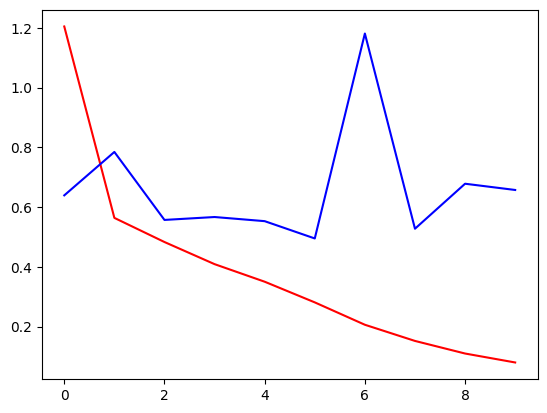

In [14]:
plt.plot(h.history['loss'],color='red',label='train')
plt.plot(h.history['val_loss'],color='blue',label='train')

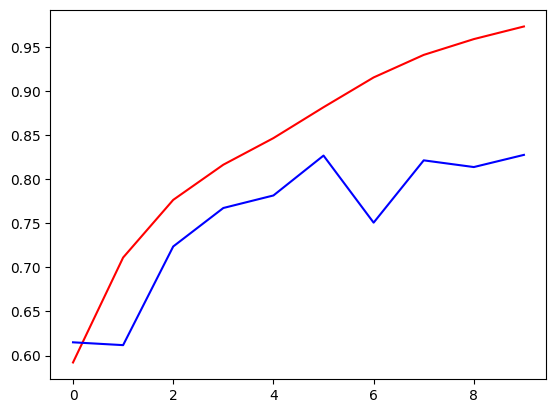

In [16]:
plt.plot(h.history['accuracy'],color='red',label='train')
plt.plot(h.history['val_accuracy'],color='blue',label='train')

In [17]:
import requests 
import cv2
from PIL import Image
from io import BytesIO

In [18]:
def predict_image(link):
    response = requests.get(link)
    image_arr = np.asarray(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(image_arr, -1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axis
    plt.show()
    img=cv2.resize(img,(255, 255)).reshape((1,255,255,3))
    return 'dog' if model_whit_batchnormalization_and_dropouts.predict(img)[0] else 'cat'

enter img link https://th.bing.com/th/id/OIP.uTlB4rrlPbwLtgIC-fjvdQHaHa?pid=ImgDet&w=185&h=185&c=7&dpr=1.3


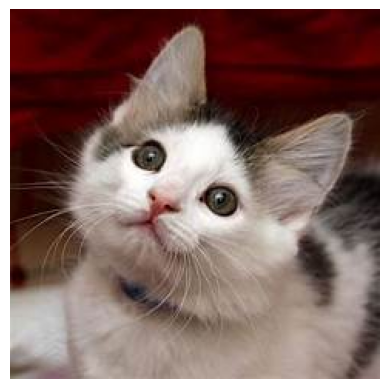

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'cat'

In [21]:
link=input('enter img link')
predict_image(link)

enter img link => https://th.bing.com/th/id/OIP.uqcY_uBdwnFgBQLZtqYcwgHaEZ?w=288&h=180&c=7&r=0&o=5&dpr=1.3&pid=1.7


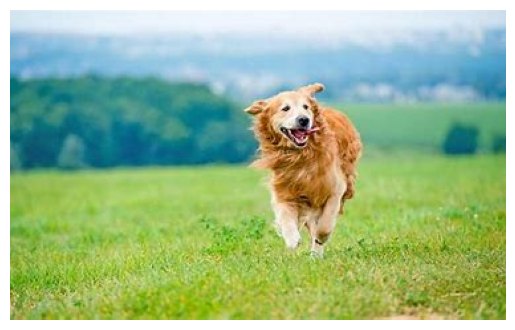

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'dog'

In [22]:
link=input('enter img link =>')
predict_image(link)

enter img link => https://wallpaperaccess.com/full/327871.jpg


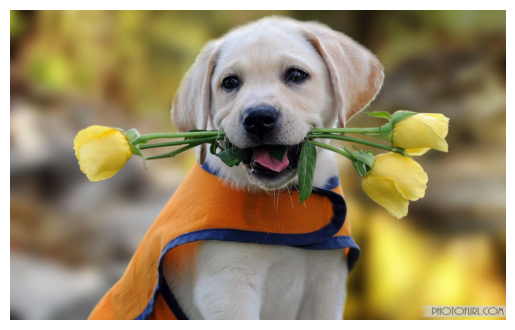

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


'dog'

In [23]:
link=input('enter img link =>')
predict_image(link)